# ML App to Forecast the Stock Market

## Introduction:

This project aims to develop a system that examines and tries to forecast the stock market. Stock markets are an interesting entity where the price movement or behaviour at certain times can be attributed to events that occur around the world, which in turns influences the buyers and sellers. Other example that influences the market can be the year-end tax loss sales. This is when traders sell their losses at the end of the year due to the nature of tax laws, leading to a downward price movement. However, when this event/phenomenon has been broadcast, traders then attempts to get ahead of the curve by buying these stocks in late December and selling them to expecting buyers in January. Becasue of this, the effect on the market will then be diluted. Overall it can be said that the price movement are largely influenced by the buyers and sellers themselves and their mentality behind each move. The system will attempt to build and test a trading strategy. 

## Dataset:

Data will be from the S&P 500 avaible from the last few years. The pandas package also allows for stock price data to be obtained, from Yahoo! or Google.

## Breakdown of this Project:

- Exploring the types of market analysis
- Stock Market Research
- Develop a trading System


# 1 Exploring the types of market analysis:

There are many financial instruments such as stocks, bonds, ETFs, FOREX and swaps, however, for this project, it will be limited to stocks and the stock market.

Stock: 
- Is a fractional share of ownership in a public listed company. The stock price is the price for every share.

There are also two types of investors, where the first is the fundamental analyst and the second is the technical anayst.

Fundamental analyst:
- These analyst investigates the company's financials looking for information that indicates if the market is undervaluing the shares. The factors innvestigated are revenue, earnings and cash flow, or types of ratios. Valuation of these comapanies are ususally compared to another.

Technical Analyst:
- Have a different approach where the analyst believes that the share prices reflects publicaly available infromation. They investigate historical prices (price rise, fall or stagnate) and its movements through time, where it may reveal clues regarding investor psychology.

# 2 Stock Market Research:

There are three forms mentioned in the efficient market hypothesis and these are called a weak form, a semi-strong form and a strong form. 

- The Weak Form: is where the market is considered efficient enough that the past information of prices cannot be used to predict future prices. This means that the information is reflected in stocks quickly making technical analysis ineffective and where in somoe scenarios, only fundamental analysis would be effective.

- The Semi-strong Form: is where the prices can be seen to immediately reflect relevant new public information circulating. This means that both the technical analysis and fundamental analysis would be ineffective.

- The Strong Form: is where the stock prices does reflect all public and private infromation. 

Overall, the market can be considered to be largely efficient in terms of its operations, However, often the money making opportunities occur when or during distinct intervals of market inefficiency. Such events can sometimes be detected by momentum strategies.

## 2.1 Momentum Strategies:

Momentum strategies can be summed up as stocks are ranked from the highest down to the lowest according to its return over a prior period. It has been suggested that people then to underreact to news during the short tem and proceed to overreact to news in the long term. This translate to investors failing to increase the prices sufficiently when the stocks are reacting to exceptionally good news and that it takes time for the investors to come around. This tendency can be called the anchoring effect.

# 3 Import the required Libraries:

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data, wb
import datetime as datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', 200)

# 4 Get the Data from source:

The data here would be obtained from 'SPY' ETF and these represents the stocks of the S&P 500. The data pulled would also be set to start from the year 2010 until December of 2019.

## 4.1 Import the required library:

In [3]:
import pandas_datareader as pdr

In [4]:
# Datetime format here: YYYY-MM-DD
start_date = pd.to_datetime('2010-01-01')
stop_date = pd.to_datetime('2019-12-01')

In [5]:
spy_df = pdr.data.get_data_yahoo('SPY', start_date, stop_date)
spy_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,112.800003,111.389999,112.769997,111.440002,90637900.0,91.241043
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.788483
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,93.034081
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,93.099579
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,93.492622
...,...,...,...,...,...,...
2019-11-22,311.239990,309.850006,311.089996,310.959991,44850200.0,309.438629
2019-11-25,313.369995,311.980011,311.980011,313.369995,48647200.0,311.836853
2019-11-26,314.279999,313.059998,313.410004,314.079987,37569000.0,312.543365


In [6]:
type(spy_df)

pandas.core.frame.DataFrame

## 4.2 Plot the Price data: 

As it can be seen from the table above, there are several columns of price data (High, Low, Open and Close), including the Volume and Adj Close. The following plot only uses the __Closing price__, and should see a price chart of the daily closing price of the S&P 500 during the selected period.

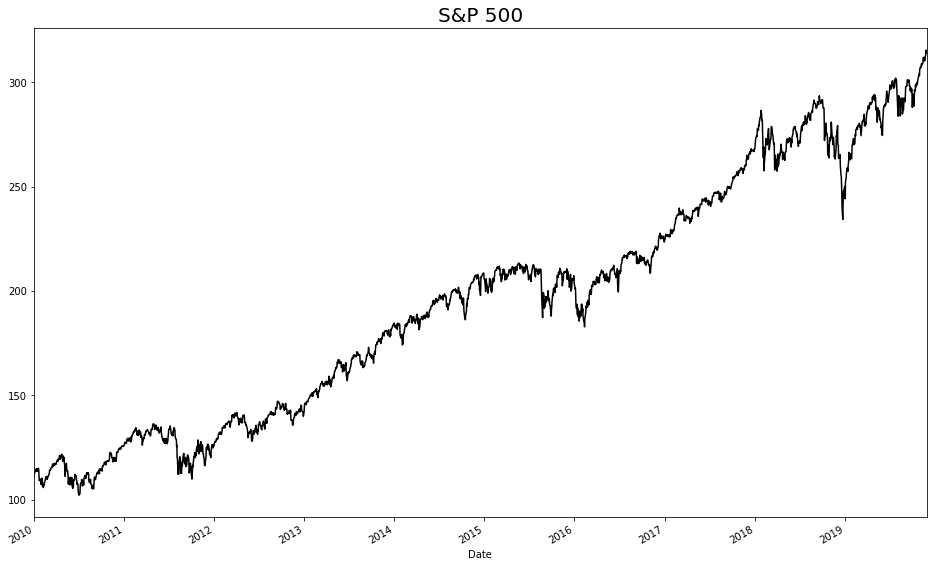

In [7]:
# Data to plot:
price_close = spy_df['Close']

# Plot:
fig, ax = plt.subplots(figsize = (16, 10))
price_close.plot(color = 'k')
plt.title("S&P 500", fontsize = 20);

## 4.3 Plot with OHLC candlesticks:

Luckily, the library called Plotly is available and open-source for ploting amazing graphs in python. One of these graphs allows for a dashboard style of plotting and makes it very intuitive. There is even an option to plot candlesticks with volume.

To get this section of code to work, please follow the installation of the 'OFFLINE' mode. This is so that the notebook can render the plot.ly package plots.

NOTE: Plotly renderers are compatible with Chrome browser, Apple's Safari cannot be used.

Plotly Installation link: https://plot.ly/python/getting-started/#initialization-for-offline-plotting

Plotly Candlestick link: https://plot.ly/python/candlestick-charts/

Advance chart: https://plot.ly/~jackp/17421/plotly-candlestick-chart-in-python/#/

In [8]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go

plotly.offline.init_notebook_mode(connected=True)

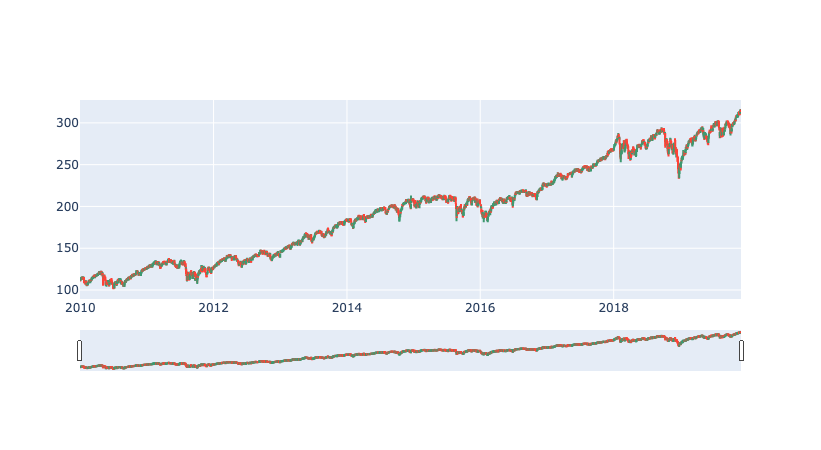

In [9]:
df = spy_df.copy()

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

# 5 Exploratory Data Analysis:

## 5.1 Check the amount of returns over this current period, if an investment in this EFT was made.

In [10]:
# Opening Price on the First day of trading:
first_open = spy_df['Open'].iloc[0]
print('The first opening price is: ${:.2f}'.format(first_open))

The first opening price is: $112.77


In [11]:
# Closing Price on the last day of trading: current day.
last_close = spy_df['Close'].iloc[-1]
print('The closing opening price on the last day is: ${:.2f}'.format(last_close))

The closing opening price on the last day is: $314.31


In [12]:
# Difference between the prices is the profit:
profit = last_close - first_open
print('The price difference is: ${:.2f}'.format(profit) + ' in the positive.')

growth = (profit/first_open) * 100
print('Growth would be: {:.2f}'.format(growth) + '%. Or {:.2f}'.format(growth) + ' Points')

The price difference is: $201.54 in the positive.
Growth would be: 178.72%. Or 178.72 Points


## 5.2 Check the amount of returns over the same period on Intraday Gains:

This will assume that stocks are bought at the opening price of each day and subsequently sold at the closing price on the same day.

In [13]:
spy_df['Daily Change'] = pd.Series(spy_df['Close'] - spy_df['Open'])
spy_df['Daily Change']

Date
2009-12-31   -1.329994
2010-01-04    0.959999
2010-01-05    0.369995
2010-01-06    0.190002
2010-01-07    0.690002
                ...   
2019-11-22   -0.130005
2019-11-25    1.389984
2019-11-26    0.669983
2019-11-27    0.870026
2019-11-29   -0.549988
Name: Daily Change, Length: 2496, dtype: float64

In [14]:
intraday_growth = spy_df['Daily Change'].sum()
print('Growth would be: {:.2f}'.format(intraday_growth) + ' Points')

Growth would be: 69.91 Points


#### Immediately it can be seen that there is a lost of around 100 Points. 

## 5.3 Check the Volatility of the Returns: 

#### Examine how the overnight trades are when compared to the intraday trades on the basis of their standard deviation.

Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is often measured as either the standard deviation or variance between returns from that same security or market index. ref: https://www.investopedia.com/terms/v/volatility.asp.

From the observations above, the overnight returns seemed to be much better at 179 points compared to intrady returns at 70 points. The volatiility must also be considered as returns are jugded on a risk-adjusted basis.

In [15]:
# Standard deviation of the Daily change:
np.std(spy_df['Daily Change'])

1.3850971947499575

In [16]:
# Create a column for the overnight change:
spy_df['Overnight Change'] = pd.Series(spy_df['Open'] - spy_df['Close'].shift(1))

# Standard Deviation of the Overnight Change:
np.std(spy_df['Overnight Change'])

1.0348376827684886

#### Comparning the output above, the lower standard deviation number of 1.03 from the Overnight Change means that higher gains can be achieved and with lower volatility. It should be noted that not all volatility  is equal.

#### Next, is to inspect what the mean change is like on the downside days against upside days for both strategies. Strategies being intraday trading vs. overnight trading.

In [17]:
# Daily Change average:
spy_df[ spy_df['Daily Change'] < 0 ]['Daily Change'].mean()

-1.00862535067967

In [18]:
# Overnight Change average:
spy_df[ spy_df['Overnight Change'] < 0 ]['Overnight Change'].mean()

-0.7304283162507492

#### Similarly, the average downside volatility is less ofr the Overnight Trading compared to the Intraday Trading.

## 5.4 Check the Daily Returns:

The above methods explores the data in terms of points, this next part will look into daily returns to provide a better understanding of the gain and losses. 

There will be 3 scenarios: 
- Daily Returns ( close to close price change )
- Intraday Returns 
- Overnight Returns

In [19]:
# Daily Returns:
daily_return = ( spy_df['Close'] - spy_df['Close'].shift(1) ) / ( spy_df['Close'].shift(1) ) * 100

# Intraday Returns:
intraday_return = ( (spy_df['Close'] - spy_df['Open']) / (spy_df['Open']) ) * 100

# Overnight Returns:
overnight_return = ( (spy_df['Open'] - spy_df['Close'].shift(1)) / spy_df['Close'].shift(1) ) * 100

In [20]:
# Inspect:
daily_return

Date
2009-12-31         NaN
2010-01-04    1.695979
2010-01-05    0.264710
2010-01-06    0.070406
2010-01-07    0.422129
                ...   
2019-11-22    0.222388
2019-11-25    0.775020
2019-11-26    0.226567
2019-11-27    0.445754
2019-11-29   -0.370868
Name: Close, Length: 2496, dtype: float64

# 6 Statistics for all the Strategies:

Taking a look at the statistics regarding each of the strategy, where these are the winning, losing and break-even trades. The Sharpe Ratio can be used to judge the returns on a risk-adjusted basis. The method compares returns by accounthing for the volatility of the returns.

The ratio describes how much excess return you receive for the extra volatility you endure for holding a riskier asset.

ref: https://www.investopedia.com/articles/07/sharpe_ratio.asp

In [21]:
# User Defined Function: Statistics.

def trade_statistics(strategy, n = 252):
    s = strategy.dropna()
    
    # winning, losing and break-even trades:
    wins = len(s[s > 0])
    losses = len(s[s < 0])
    evens = len(s[s == 0])
    
    # Mean calc.:
    mean_win = round(s[s > 0].mean(), 3)
    mean_loss = round(s[s < 0].mean(), 3)
    
    # Win ratio:
    win_ratio = round( wins/losses, 3)
    
    # Mean trade:
    mean_trd = round(s.mean(), 3)
    
    # Standard Deviation:
    standard_deviation = round( np.std(s), 3)
    
    # Maximum win and loss:
    max_l = round(s.min(), 3)
    max_w = round(s.max(), 3)
    
    # Sharpe Ratio:
    sharpe_ratio = round((s.mean() / np.std(s)) * np.sqrt(n), 4)
    
    count = len(s)
    
    # Print the Statistics:
    print('Trades:', count,\
            '\nWins:', wins,\
            '\nLosses:', losses,\
            '\nBreakeven:', evens,\
            '\nWin/Loss Ratio', win_ratio,\
            '\nMean Win:', mean_win,\
            '\nMean Loss:', mean_loss,\
            '\nMean', mean_trd,\
            '\nStd Dev:', standard_deviation,\
            '\nMax Loss:', max_l,\
            '\nMax Win:', max_w,\
            '\nSharpe Ratio:', sharpe_ratio)

#### Find the statistics for each Trading Strategy:
1. Buy and Hold -> Daily Returns
2. Intraday returns/Trades 
3. Overnight returns/Trades

In [22]:
# 1. Buy and Hold -> Daily Returns:
trade_statistics(daily_return)

Trades: 2495 
Wins: 1369 
Losses: 1116 
Breakeven: 10 
Win/Loss Ratio 1.227 
Mean Win: 0.629 
Mean Loss: -0.668 
Mean 0.046 
Std Dev: 0.932 
Max Loss: -6.512 
Max Win: 5.052 
Sharpe Ratio: 0.7821


In [23]:
# 2. Intraday returns/Trades:
trade_statistics(intraday_return)

Trades: 2496 
Wins: 1357 
Losses: 1120 
Breakeven: 19 
Win/Loss Ratio 1.212 
Mean Win: 0.478 
Mean Loss: -0.536 
Mean 0.019 
Std Dev: 0.72 
Max Loss: -4.175 
Max Win: 4.327 
Sharpe Ratio: 0.4265


In [24]:
# 3. Overnight returns/Trades:
trade_statistics(overnight_return)

Trades: 2495 
Wins: 1342 
Losses: 1121 
Breakeven: 32 
Win/Loss Ratio 1.197 
Mean Win: 0.381 
Mean Loss: -0.398 
Mean 0.026 
Std Dev: 0.566 
Max Loss: -5.227 
Max Win: 4.09 
Sharpe Ratio: 0.727


From the statistics above, it can be seen that by comparing the Mean (Mean returnn) and the Standard  Deviation between all the strategies: 
- Position 1 -> The Buy-and-Hold method provides teh highest mean return (at 0.046) and standard deviation (0.932). It also have the largest daily drawdonw or Loss (at -6.512).
- Position 2 ->The next best is the Overnight trades, where it has a Mean return at 0.026 and a standard deviation of 0.566 (less volatile). 
- Position 3 ->The Intraday trades presents as the worst approach to trading in this case.

Overall, these results are reflected in the Sharpe Ratio and can be ranked accordingly(by positions).

# 7 Real Risk in Trading Strategy Development is called the Data Mining Fallacy:

This is when enough strategies are tested by performaning many random overnight signals and choose the best ones (like generating 5,000 signals overnight), and by some random chance, an amazing outcome would be found through data mining. __This cannot be used__.

It is important to note that trading strategies have to be anchored to real-world investor biases and behaviours. The idea is to trade the people who trade the markets. The advantage comes from developing the understanding when people might react incorrectly to news or certain situations.

## 7.1 Further Analysis:

Begin with using more data, starting from the year 2000.

In [25]:
start_date = pd.to_datetime('2000-01-01')
stop_date = pd.to_datetime('2019-12-01')

In [26]:
# Get the data:
spy_2000_df = pdr.data.get_data_yahoo('SPY', start_date, stop_date)

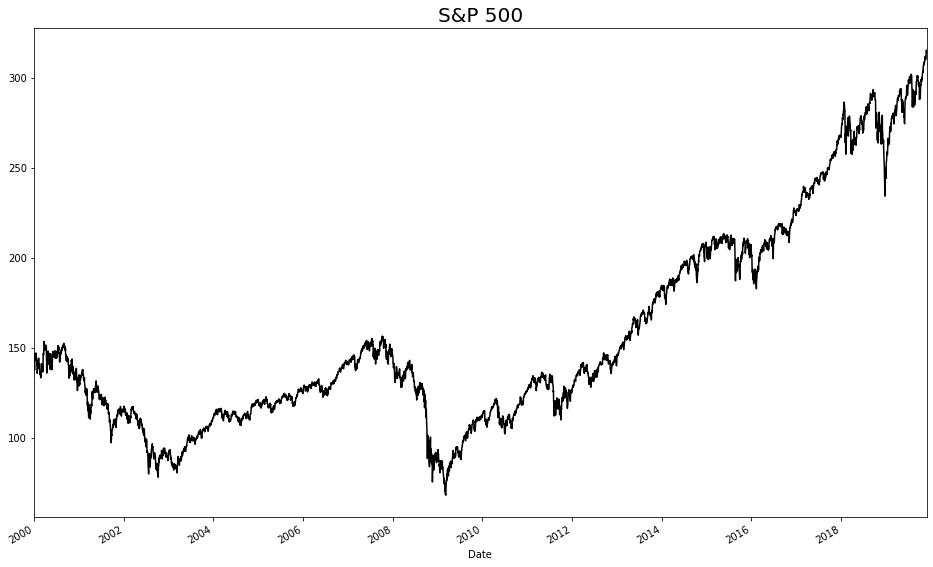

In [27]:
# Data to plot:
price_close = spy_2000_df['Close']

# Plot:
fig, ax = plt.subplots(figsize = (16, 10))
price_close.plot(color = 'k')
plt.title("S&P 500", fontsize = 20);

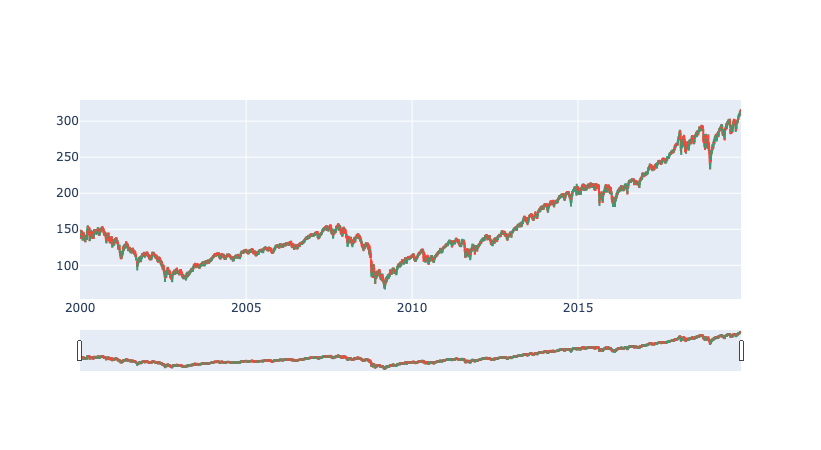

In [28]:
df = spy_2000_df.copy()

fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

This can be seen to show more price movement than the data starting from 2010. There can be seen that there are 4 or 5 major dips in price, but overal the trend of the price is moving in the positive direction.

## 7.2 Find the baseline for this Data (2000 to 2019):

In [29]:
# Assign the variables:

# Daily Returns:
daily_return_2000 = ( spy_2000_df['Close'] - spy_2000_df['Close'].shift(1) ) / ( spy_2000_df['Close'].shift(1) ) * 100

# Intraday Returns:
intraday_return_2000 = ( (spy_2000_df['Close'] - spy_2000_df['Open']) / (spy_2000_df['Open']) ) * 100

# Overnight Returns:
overnight_return_2000 = ( (spy_2000_df['Open'] - spy_2000_df['Close'].shift(1)) / spy_2000_df['Close'].shift(1) ) * 100

In [31]:
# Calculate the total Points for each of the strategy above:
daily_return_Points = ( spy_2000_df['Close'] - spy_2000_df['Close'].shift(1) ).sum()

print('The total points for Daily_Returns is: {:.2f}'.format(daily_return_Points) + ' Points')

The total points for Daily_Returns is: 167.43 Points


In [32]:
intraday_return_Points = ( spy_2000_df['Close'] - spy_2000_df['Open'] ).sum()

print('The total points for Intraday_Return is: {:.2f}'.format(intraday_return_Points) + ' Points')

The total points for Intraday_Return is: -9.00 Points


In [33]:
Overnight_return_Points = ( spy_2000_df['Open'] - spy_2000_df['Close'].shift(1) ).sum()

print('The total points for Overnight_Returns is: {:.2f}'.format(Overnight_return_Points) + ' Points')

The total points for Overnight_Returns is: 176.47 Points


## 7.3 Get the Statistics for these trading strategies:

In [38]:
# Daily return Trade Statistics for the 2000 to 2019 data:
trade_statistics(daily_return_2000)

Trades: 5010 
Wins: 2692 
Losses: 2299 
Breakeven: 19 
Win/Loss Ratio 1.171 
Mean Win: 0.762 
Mean Loss: -0.843 
Mean 0.022 
Std Dev: 1.199 
Max Loss: -9.845 
Max Win: 14.52 
Sharpe Ratio: 0.2962


In [39]:
# Intraday return Trade Statistics for the 2000 to 2019 data:
trade_statistics(intraday_return_2000)

Trades: 5011 
Wins: 2635 
Losses: 2338 
Breakeven: 38 
Win/Loss Ratio 1.127 
Mean Win: 0.633 
Mean Loss: -0.708 
Mean 0.003 
Std Dev: 0.989 
Max Loss: -8.991 
Max Win: 8.435 
Sharpe Ratio: 0.0472


In [40]:
# Overnight return Trade Statistics for the 2000 to 2019 data:
trade_statistics(overnight_return_2000)

Trades: 5010 
Wins: 2673 
Losses: 2279 
Breakeven: 58 
Win/Loss Ratio 1.173 
Mean Win: 0.413 
Mean Loss: -0.442 
Mean 0.019 
Std Dev: 0.656 
Max Loss: -8.322 
Max Win: 6.068 
Sharpe Ratio: 0.4674


#### When more data is available, the statistics shows that:
- If money was held during the day (Intraday) for the past 19 years, it is highly likely that money would have been lost (at -9.00 Points). This can be seen with the Sharpe Ratio of 0.0472, where the gains is very low for the additional volatility and risk.
- Both the Daily return and Overnight strategy seems to be performing better, as the Sharpe Ratio(s) are higher, it means that even with the greater volatility, money would still be made. 
- If money was held overnight, it would be possible to earn money (at 176.47 Points).

# 8 Building a Regression Model:

This section begins with building a basic __Regression model__ that considers the stock's prior closing values to predict the next day's close price. 

Next sectionn would then extend the model by incorporating support vectors, forming the model as a __Support Vector Regression__.

SVR Maths link: https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html

SVR Intuition 1: https://medium.com/coinmonks/support-vector-regression-or-svr-8eb3acf6d0ff
SVR Intuition 2: http://www.saedsayad.com/support_vector_machine_reg.htm